## Importing Required Libraries

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

## Reading data

In [2]:
x_train = np.genfromtxt('../Datasets/X_train.csv', delimiter = ',')[1:, 1:]
x_test  = np.genfromtxt('../Datasets/X_test.csv', delimiter = ',')[1:, 1:]

In [3]:
y_train = np.genfromtxt('../Datasets/y_train.csv', delimiter = ',')[1:, 1:]
y_train = y_train.reshape(y_train.shape[0])

y_test = np.genfromtxt('../Datasets/y_test.csv', delimiter = ',')[1:, 1:]
y_test = y_test.reshape(y_test.shape[0])

## Base Line Model (Without Optimization)

In [4]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [6]:
print("-----------------------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

-----------------------------------------------------------------------


In [7]:
print("-----------------------------------------------------------------------")
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------------------------")
print('\033[1m'+"Train Accuracy : {:.2f}%".format(accuracy_score(y_train,model.predict(x_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("-----------------------------------------------------------------------")
print("overfitting")

-----------------------------------------------------------------------
Confusion matrix : 
 [[25  4]
 [ 4 28]]
-----------------------------------------------------------------------
Train Accuracy : 100.00%
Test Accuracy  : 86.89%
-----------------------------------------------------------------------
overfitting


## Effect of number of Trees on Accuracy

In [8]:
n_estimator_list = np.arange(1,50,1)
train_acc = list()
test_acc = list()
max_acc = 0
max_i = 0

In [9]:
for i in n_estimator_list:
    print(i, end = "  ")
    clf = RandomForestClassifier(random_state = 0, n_estimators = i)
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    if (accuracy_score(y_test, y_pred_test)) >= max_acc:
        max_i = i
        max_acc = (accuracy_score(y_test, y_pred_test))

1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  

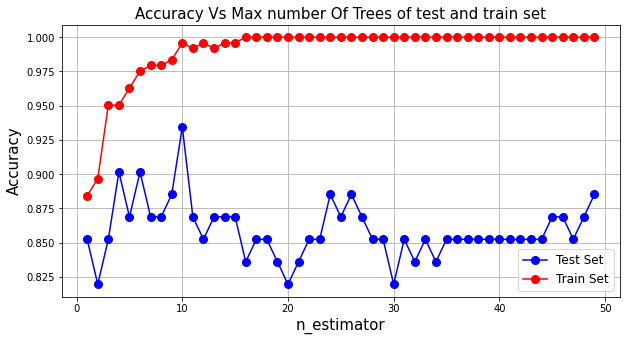

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(n_estimator_list, test_acc, marker = 'o', markersize = 8, color = 'blue', label = 'Test Set')
ax.plot(n_estimator_list, train_acc, marker = 'o', markersize = 8, color = 'red', label = 'Train Set')
ax.set_xlabel('n_estimator', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.set_title('Accuracy Vs Max number Of Trees of test and train set', fontsize = 15)
plt.grid()
ax.legend(prop = {'size' : 12})
plt.show()

In [17]:
print("Accuracy Test: ",max_acc)
print("number of Trees:",max_i)

Accuracy Test:  0.9344262295081968
number of Trees: 10


In [12]:
model = RandomForestClassifier(random_state = 0,n_estimators = max_i)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [13]:
print("-----------------------------------------------------------------------")
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------------------------")
print('\033[1m'+"Train Accuracy : {:.2f}%".format(accuracy_score(y_train,model.predict(x_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("-----------------------------------------------------------------------")
print("seems fine,but still overfitting")

-----------------------------------------------------------------------
Confusion matrix : 
 [[28  1]
 [ 3 29]]
-----------------------------------------------------------------------
Train Accuracy : 99.59%
Test Accuracy  : 93.44%
-----------------------------------------------------------------------
seems fine,but still overfitting


## Effect of Max depth on accuracy

In [14]:
max_depths = np.arange(1,50,1)
val_Acc = list()
train_Acc = list()
for i in max_depths:
    print("Max Depth :", i, end = ',   ')
    clf = RandomForestClassifier(random_state = 0, max_depth = i)
    clf.fit(x_train, y_train)
    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)
    val_Acc.append(accuracy_score(y_test, y_pred_test))
    train_Acc.append(accuracy_score(y_train, y_pred_train))

Max Depth : 1,   Max Depth : 2,   Max Depth : 3,   Max Depth : 4,   Max Depth : 5,   Max Depth : 6,   Max Depth : 7,   Max Depth : 8,   Max Depth : 9,   Max Depth : 10,   Max Depth : 11,   Max Depth : 12,   Max Depth : 13,   Max Depth : 14,   Max Depth : 15,   Max Depth : 16,   Max Depth : 17,   Max Depth : 18,   Max Depth : 19,   Max Depth : 20,   Max Depth : 21,   Max Depth : 22,   Max Depth : 23,   Max Depth : 24,   Max Depth : 25,   Max Depth : 26,   Max Depth : 27,   Max Depth : 28,   Max Depth : 29,   Max Depth : 30,   Max Depth : 31,   Max Depth : 32,   Max Depth : 33,   Max Depth : 34,   Max Depth : 35,   Max Depth : 36,   Max Depth : 37,   Max Depth : 38,   Max Depth : 39,   Max Depth : 40,   Max Depth : 41,   Max Depth : 42,   Max Depth : 43,   Max Depth : 44,   Max Depth : 45,   Max Depth : 46,   Max Depth : 47,   Max Depth : 48,   Max Depth : 49,   

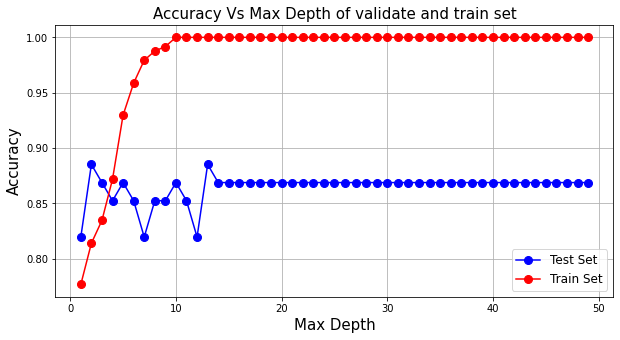

In [15]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(max_depths, val_Acc, marker = 'o', markersize = 8, color = 'blue', label = 'Test Set')
ax.plot(max_depths, train_Acc, marker = 'o', markersize = 8, color = 'red', label = 'Train Set')
ax.set_xlabel('Max Depth', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.set_title('Accuracy Vs Max Depth of validate and train set', fontsize = 15)
plt.grid()
ax.legend(prop = {'size' : 12})
plt.show()

In [18]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(model,
                feature_names=X.columns,
                filled=True,
                rounded=True)